In [9]:
import sys

sys.path.append("../src")

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import multilayer_perceptron as MLP
import mnist_loader
from tqdm import tqdm

In [11]:
# Parameters
Sizes = [[784, q, j, 10, k] for q in [40,60] for j in [40,60] for k in [5,10]]
LR = np.linspace(10e-6,10e-5,10)

### Load Data and Prepare the Data
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
validation_data = list(validation_data)
test_data = list(test_data)

### Define the Models
NN = [ MLP.NeuralNetwork(sizes , learning_rate=lr) for lr in LR for sizes in Sizes]

In [12]:
# Train
for model_index in tqdm( range(len(NN)) , desc="Progress", ascii=" -" ) :
    NN[model_index].Train_2Layers(training_data)

Progress: 100%|----------| 80/80 [50:10<00:00, 37.64s/it]


In [13]:
NN_20 = NN[::2]
NN_20_qj =[ NN_20[q::4] for q in range(4)]

NN_40 = NN[1::2]
NN_40_qj =[ NN_40[q::4] for q in range(4)]

In [14]:
Validate_20 = np.array([[NN_20_qj[q][j].Validate_2Layer(validation_data)[1] for j in range(len(LR))] for q in range(len(NN_20_qj))])
Validate_40 = np.array([[NN_40_qj[q][j].Validate_2Layer(validation_data)[1] for j in range(len(LR))] for q in range(len(NN_40_qj))])

Test_20 = np.array([[NN_20_qj[q][j].Test_2Layer(test_data) for j in range(len(LR))] for q in range(len(NN_20_qj))])
Test_40 = np.array([[NN_40_qj[q][j].Test_2Layer(test_data) for j in range(len(LR))] for q in range(len(NN_40_qj))])

Learning_Loss_20 = np.array([[NN_20_qj[q][j].Loss for j in range(len(LR))] for q in range(len(NN_20_qj))])
Learning_Loss_40 = np.array([[NN_40_qj[q][j].Loss for j in range(len(LR))] for q in range(len(NN_40_qj))])

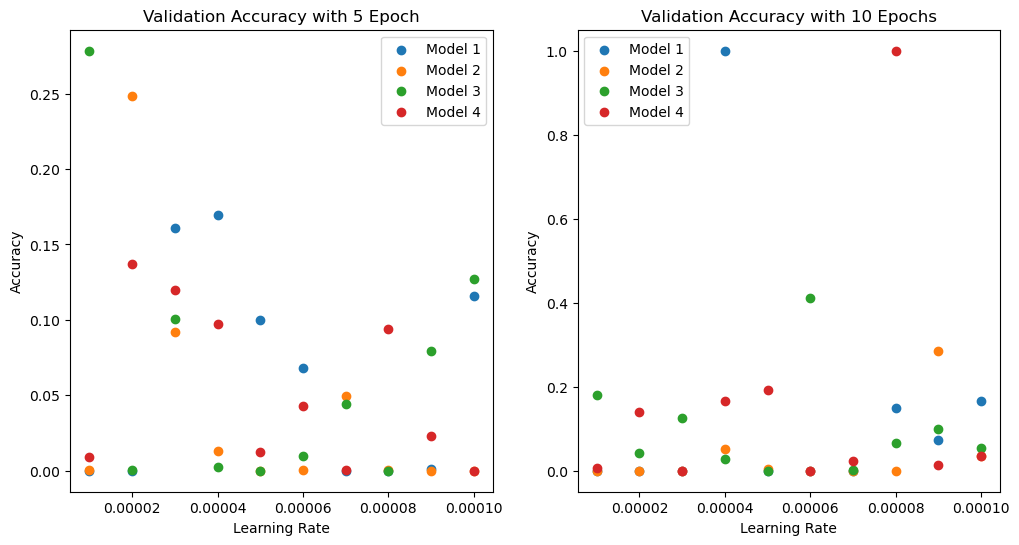

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for q in range(len(Validate_20)):
    plt.scatter(LR, Validate_20[q], label=f'Model {q+1}')
plt.title("Validation Accuracy with 5 Epoch")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
for q in range(len(Validate_40)):
    plt.scatter(LR, Validate_40[q], label=f'Model {q+1}')
plt.title("Validation Accuracy with 10 Epochs")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend()

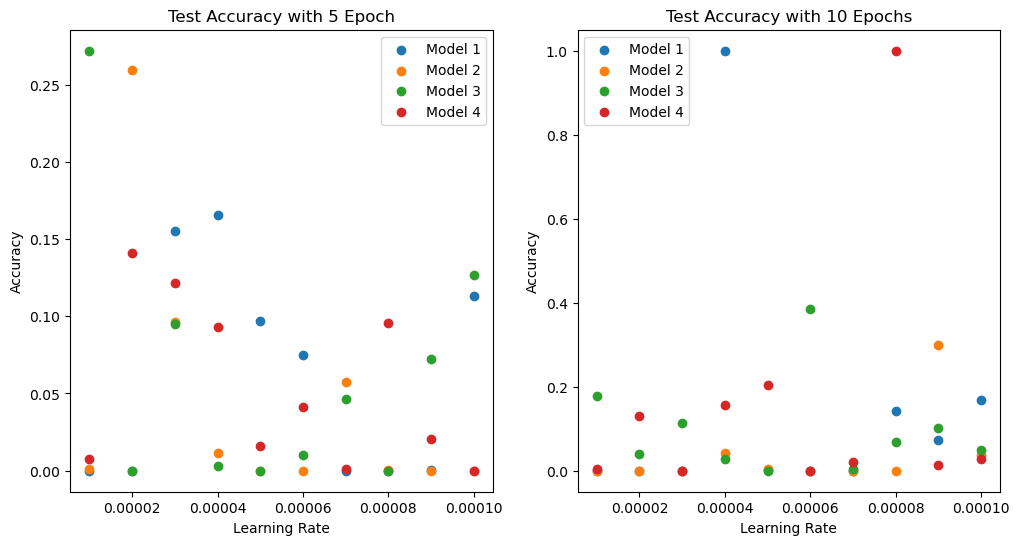

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for q in range(len(Test_20)):
    plt.scatter(LR, Test_20[q], label=f'Model {q+1}')
plt.title("Test Accuracy with 5 Epoch")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
for q in range(len(Test_40)):
    plt.scatter(LR, Test_40[q], label=f'Model {q+1}')
plt.title("Test Accuracy with 10 Epochs")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend()

Text(0.5, 0.98, 'Learning Loss Curves with 20 Epochs')

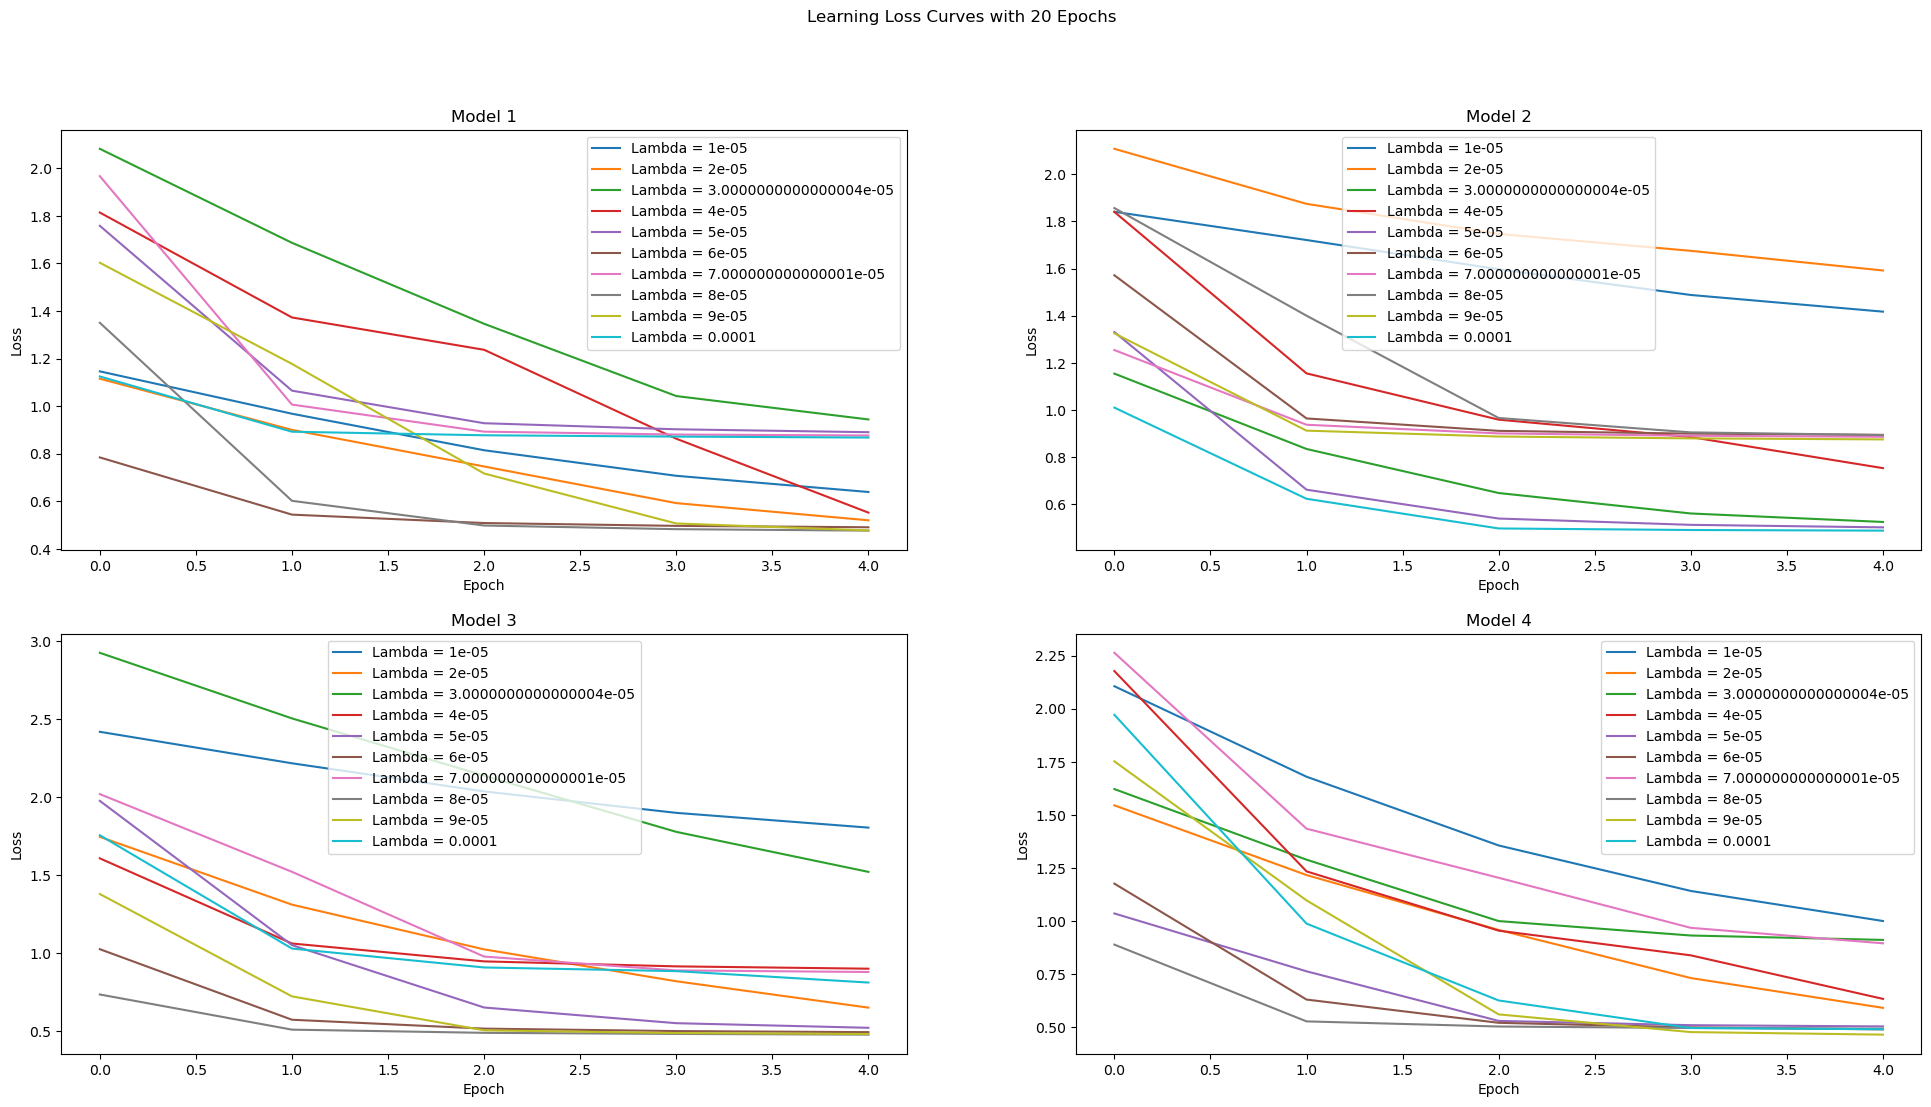

In [14]:
plt.figure(figsize=(24, 12))
plt.subplot(2, 2, 1)
for q in range(len(LR)):
    plt.plot( Learning_Loss_20[0][q], label=f'Lambda = {LR[q]}')
plt.title("Model 1")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 2)
for q in range(len(LR)):
    plt.plot(Learning_Loss_20[1][q], label=f'Lambda = {LR[q]}')
plt.title("Model 2")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.legend()

plt.subplot(2, 2, 3)
for q in range(len(LR)):
    plt.plot( Learning_Loss_20[2][q], label=f'Lambda = {LR[q]}')
plt.title("Model 3")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 4)
for q in range(len(LR)):
    plt.plot(Learning_Loss_20[3][q], label=f'Lambda = {LR[q]}')
plt.title("Model 4")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.suptitle("Learning Loss Curves with 20 Epochs")